In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:, j])
        median_of_this_feature = np.median(flare_data[:, j])
        for i in range(n_elements):
            flare_data[i, j] = (
                flare_data[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

# Incorrect Normalisation

  Here I am first normalizing the positive and the negative data and then combining it.

In [22]:
positive = pd.read_csv("positive_class_events.txt", delimiter=" ")
negative = pd.read_csv("negative_class_events.txt", delimiter=" ")

In [23]:
positive = positive.drop(["HARPNUM","NOAA_Number","Class","Peak_Time"],axis =1)
negative = negative.drop(["HARPNUM","NOAA_Number","Class","Peak_Time"],axis =1)

In [24]:
positive = normalize_the_data(positive)
negative = normalize_the_data(negative)

In [25]:
data = pd.concat([pd.DataFrame(positive),pd.DataFrame(negative)],axis =0,ignore_index=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.708512,1.020477,1.162440,1.285170,1.691805,-0.036460,1.815154,1.063384,1.730173,1.111528,0.619452,-0.282076,-0.440471,-0.086145,1.675319,-0.467240,0.146433,0.224882
1,-0.686412,0.007347,-0.306009,0.160881,0.857965,-0.678740,-0.004694,-0.291370,0.643372,-0.239930,0.796928,-0.654517,-0.740141,-0.362270,0.763785,-0.453965,-0.560387,-0.908470
2,0.784492,-0.123876,0.273629,-0.011944,-0.418953,0.680920,-0.652172,0.276086,-0.666248,-0.065443,-0.654741,0.519884,0.521157,0.378351,-0.419582,0.343911,0.198529,0.015375
3,-0.576116,1.116465,0.339365,-1.436277,-1.484304,-0.715686,-0.864535,0.705280,-1.416355,0.612875,0.014956,-0.664064,-0.121175,-0.709593,-1.285150,-0.446544,-1.033478,-0.411466
4,-0.752848,1.140877,1.631000,0.220829,0.661970,-0.189790,1.239314,2.158964,0.832700,0.915074,1.925412,-0.349912,0.970847,-0.301056,0.625885,-0.209916,0.107009,0.790870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,-0.299233,0.641625,0.569322,-0.300908,0.392580,-0.313250,0.922491,0.648393,0.444231,0.541482,0.489470,-0.328639,-0.273504,-0.225483,0.345065,-0.197846,-0.312985,-0.227986
416,0.456871,-1.020386,0.237556,-1.302556,-1.873597,-0.120225,-1.593901,0.289397,-1.926413,-1.155979,-0.352208,-0.143005,-0.674997,-0.227129,-2.016897,0.043824,-0.361447,-0.447601
417,0.297464,-0.880976,-0.595745,1.944967,1.346093,0.186270,0.168259,-0.366350,0.964532,-0.534362,-0.915923,0.055290,0.438768,0.716042,1.149175,0.188742,0.356063,0.513385
418,0.133364,0.937452,0.564636,-0.986270,-1.395428,-0.070336,-0.236645,0.660610,-1.322885,0.968181,-0.316983,-0.104238,0.324694,-0.232220,-1.310026,0.107632,-0.267215,-0.001644


In [26]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [27]:
xdata = np.array(data)
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [28]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[2.53461527e-01 1.08256432e+00 2.34930569e+00 9.80033450e-01
 6.89968938e-01 2.48195755e-02 3.12394886e+00 1.47724089e+00
 1.74910927e-01 7.41645634e-04 2.79576389e-01 1.38229396e-01
 5.70836323e-03 3.10906652e-01 9.07150618e-01 1.04641940e-01
 4.83759321e-02 1.30749939e-01]


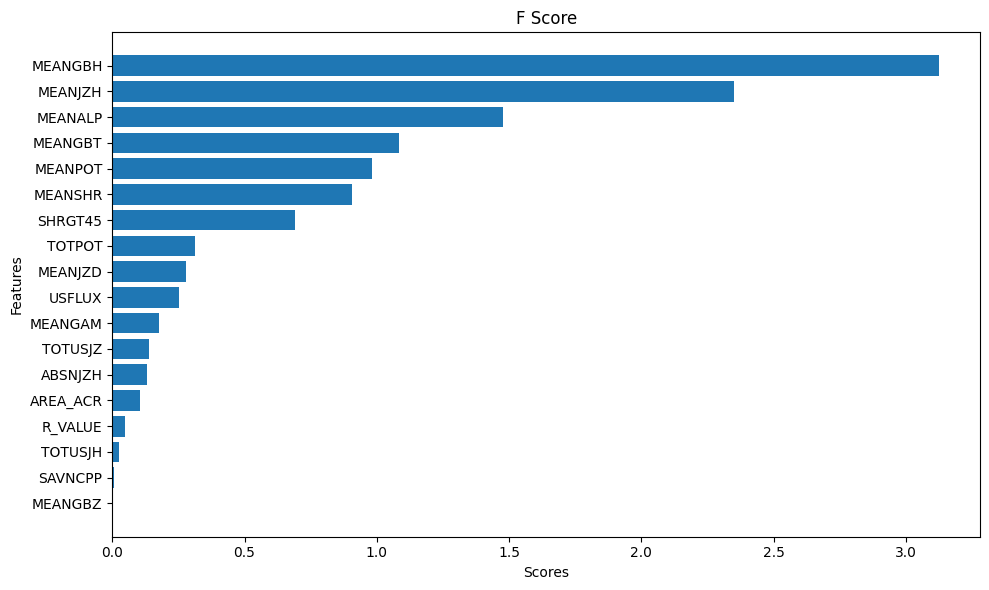

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [30]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [31]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

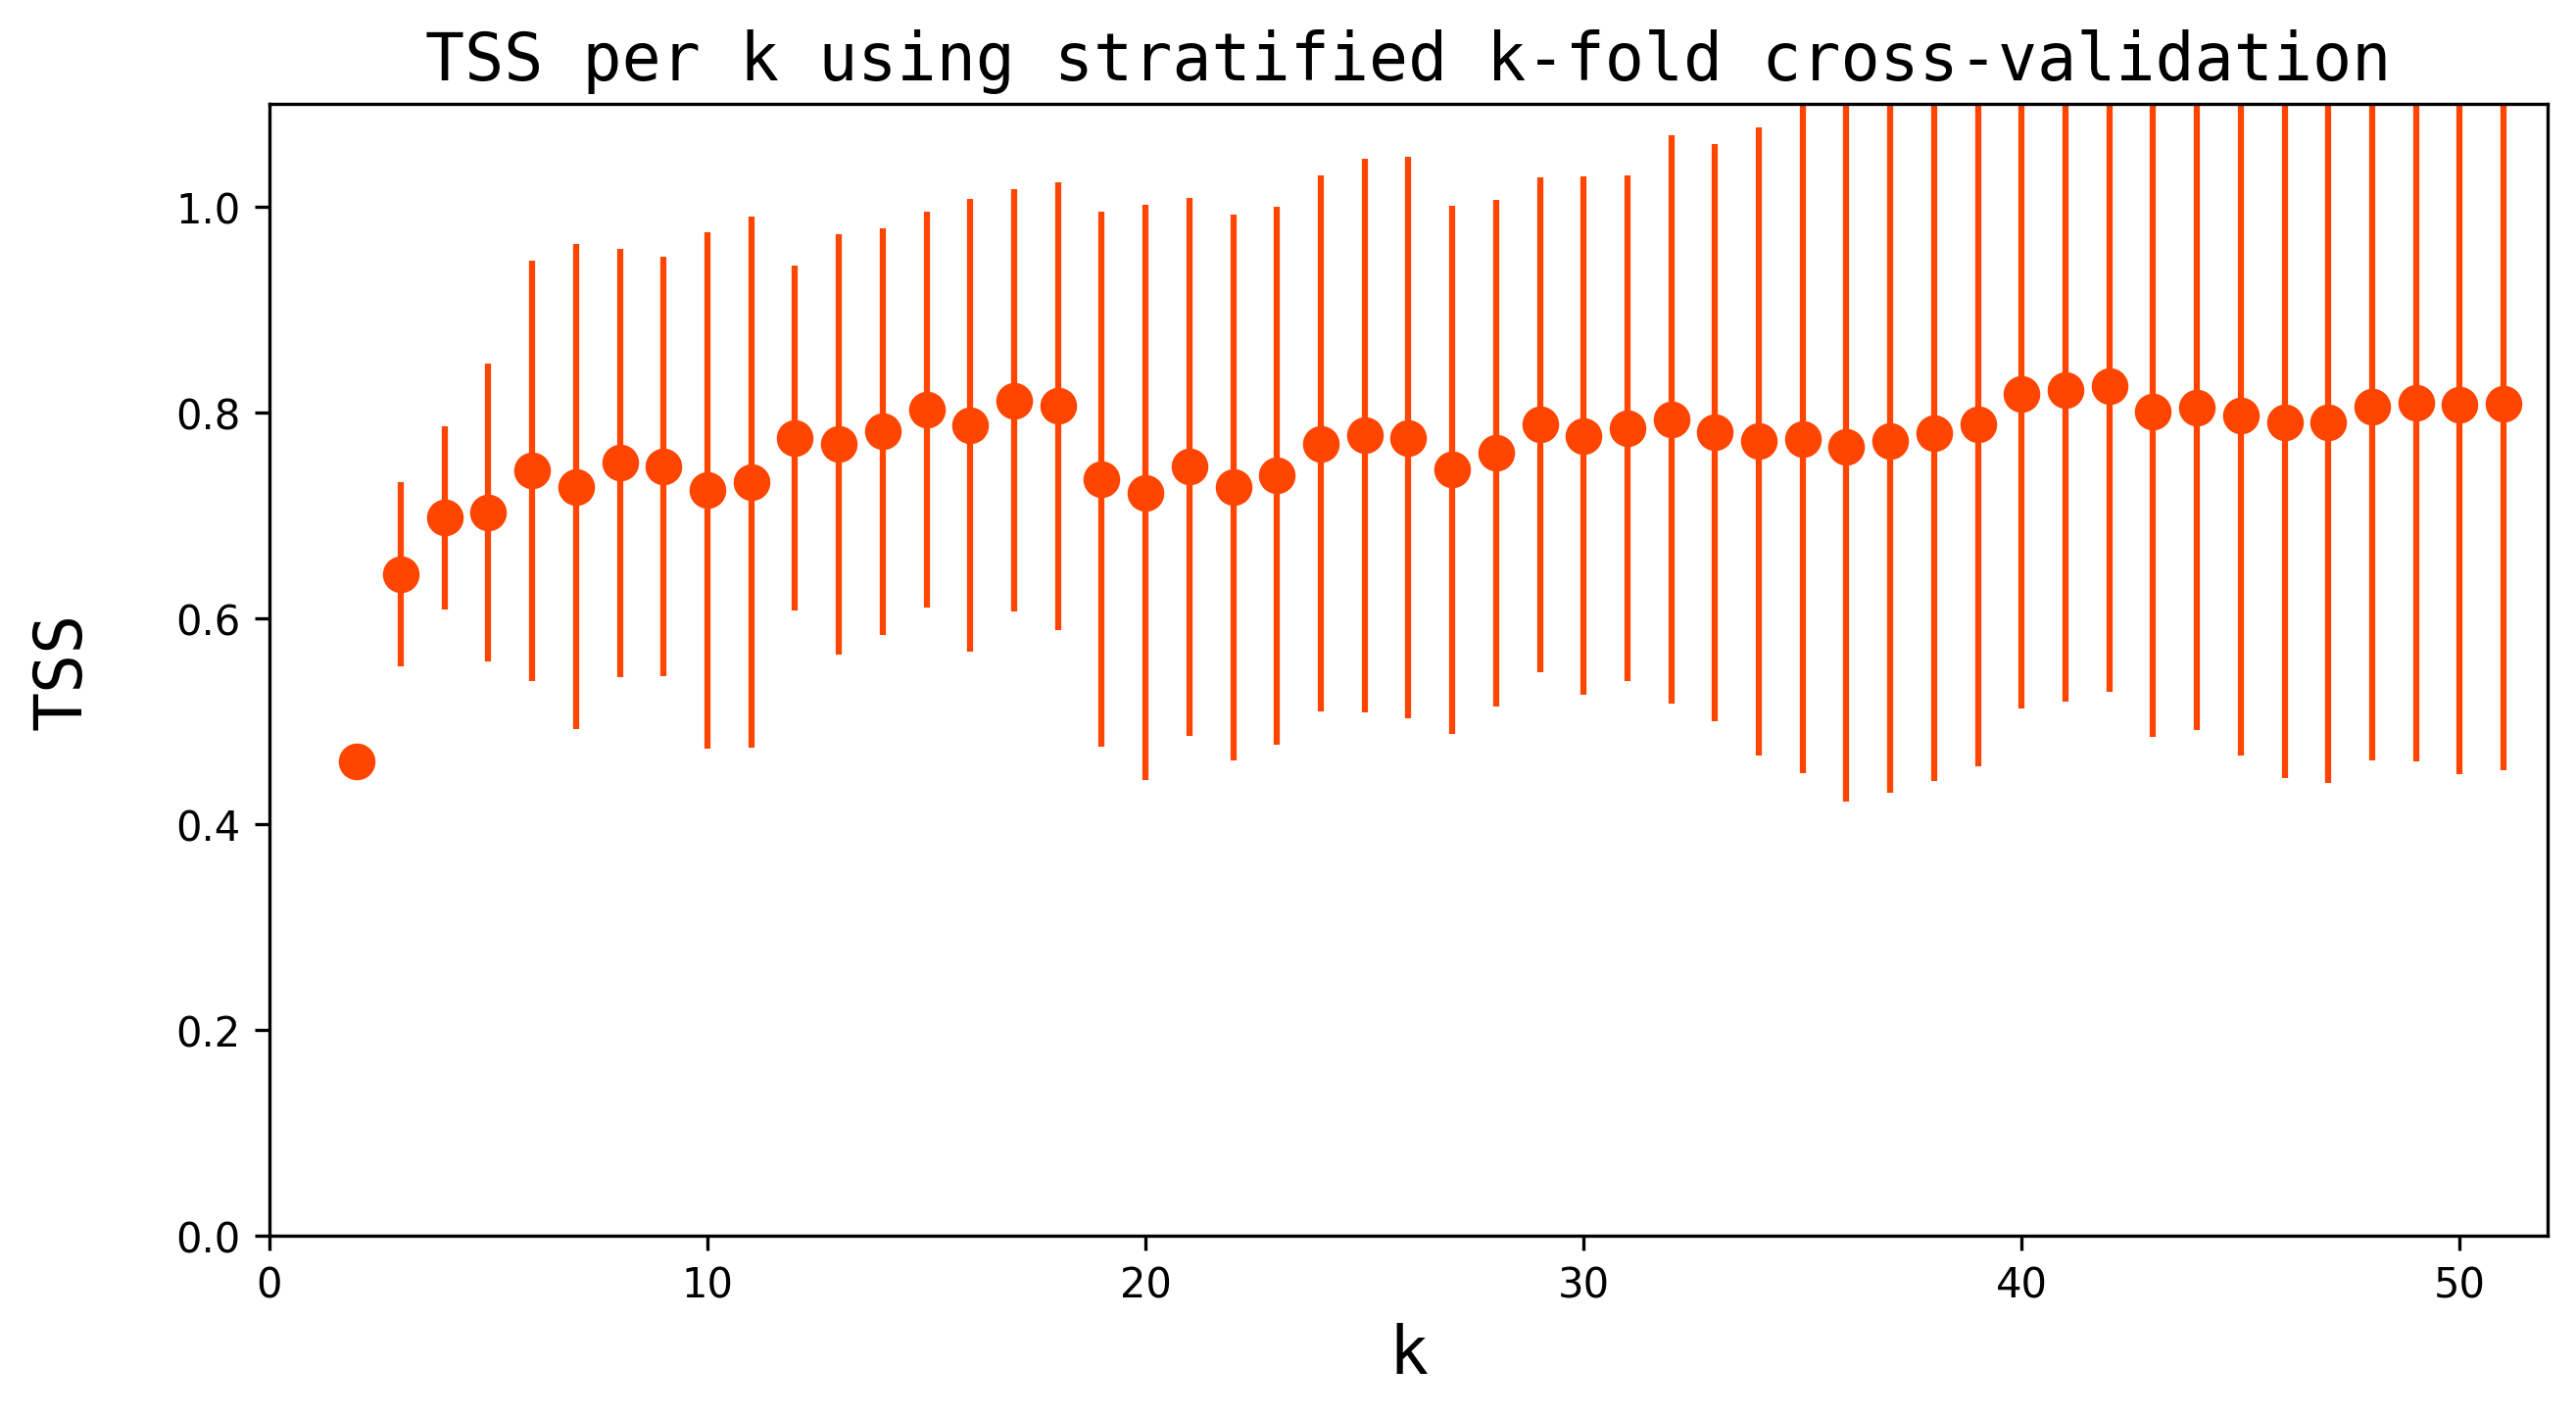

In [32]:
fig, ax = plt.subplots(figsize=(10, 8),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('k', **text_style)
ax.set_ylabel('TSS', labelpad=20, **text_style)
plt.title(r'TSS per k using stratified k-fold cross-validation', **text_style)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [33]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.7323124291038728 plus or minus 0.2578913911564465 .


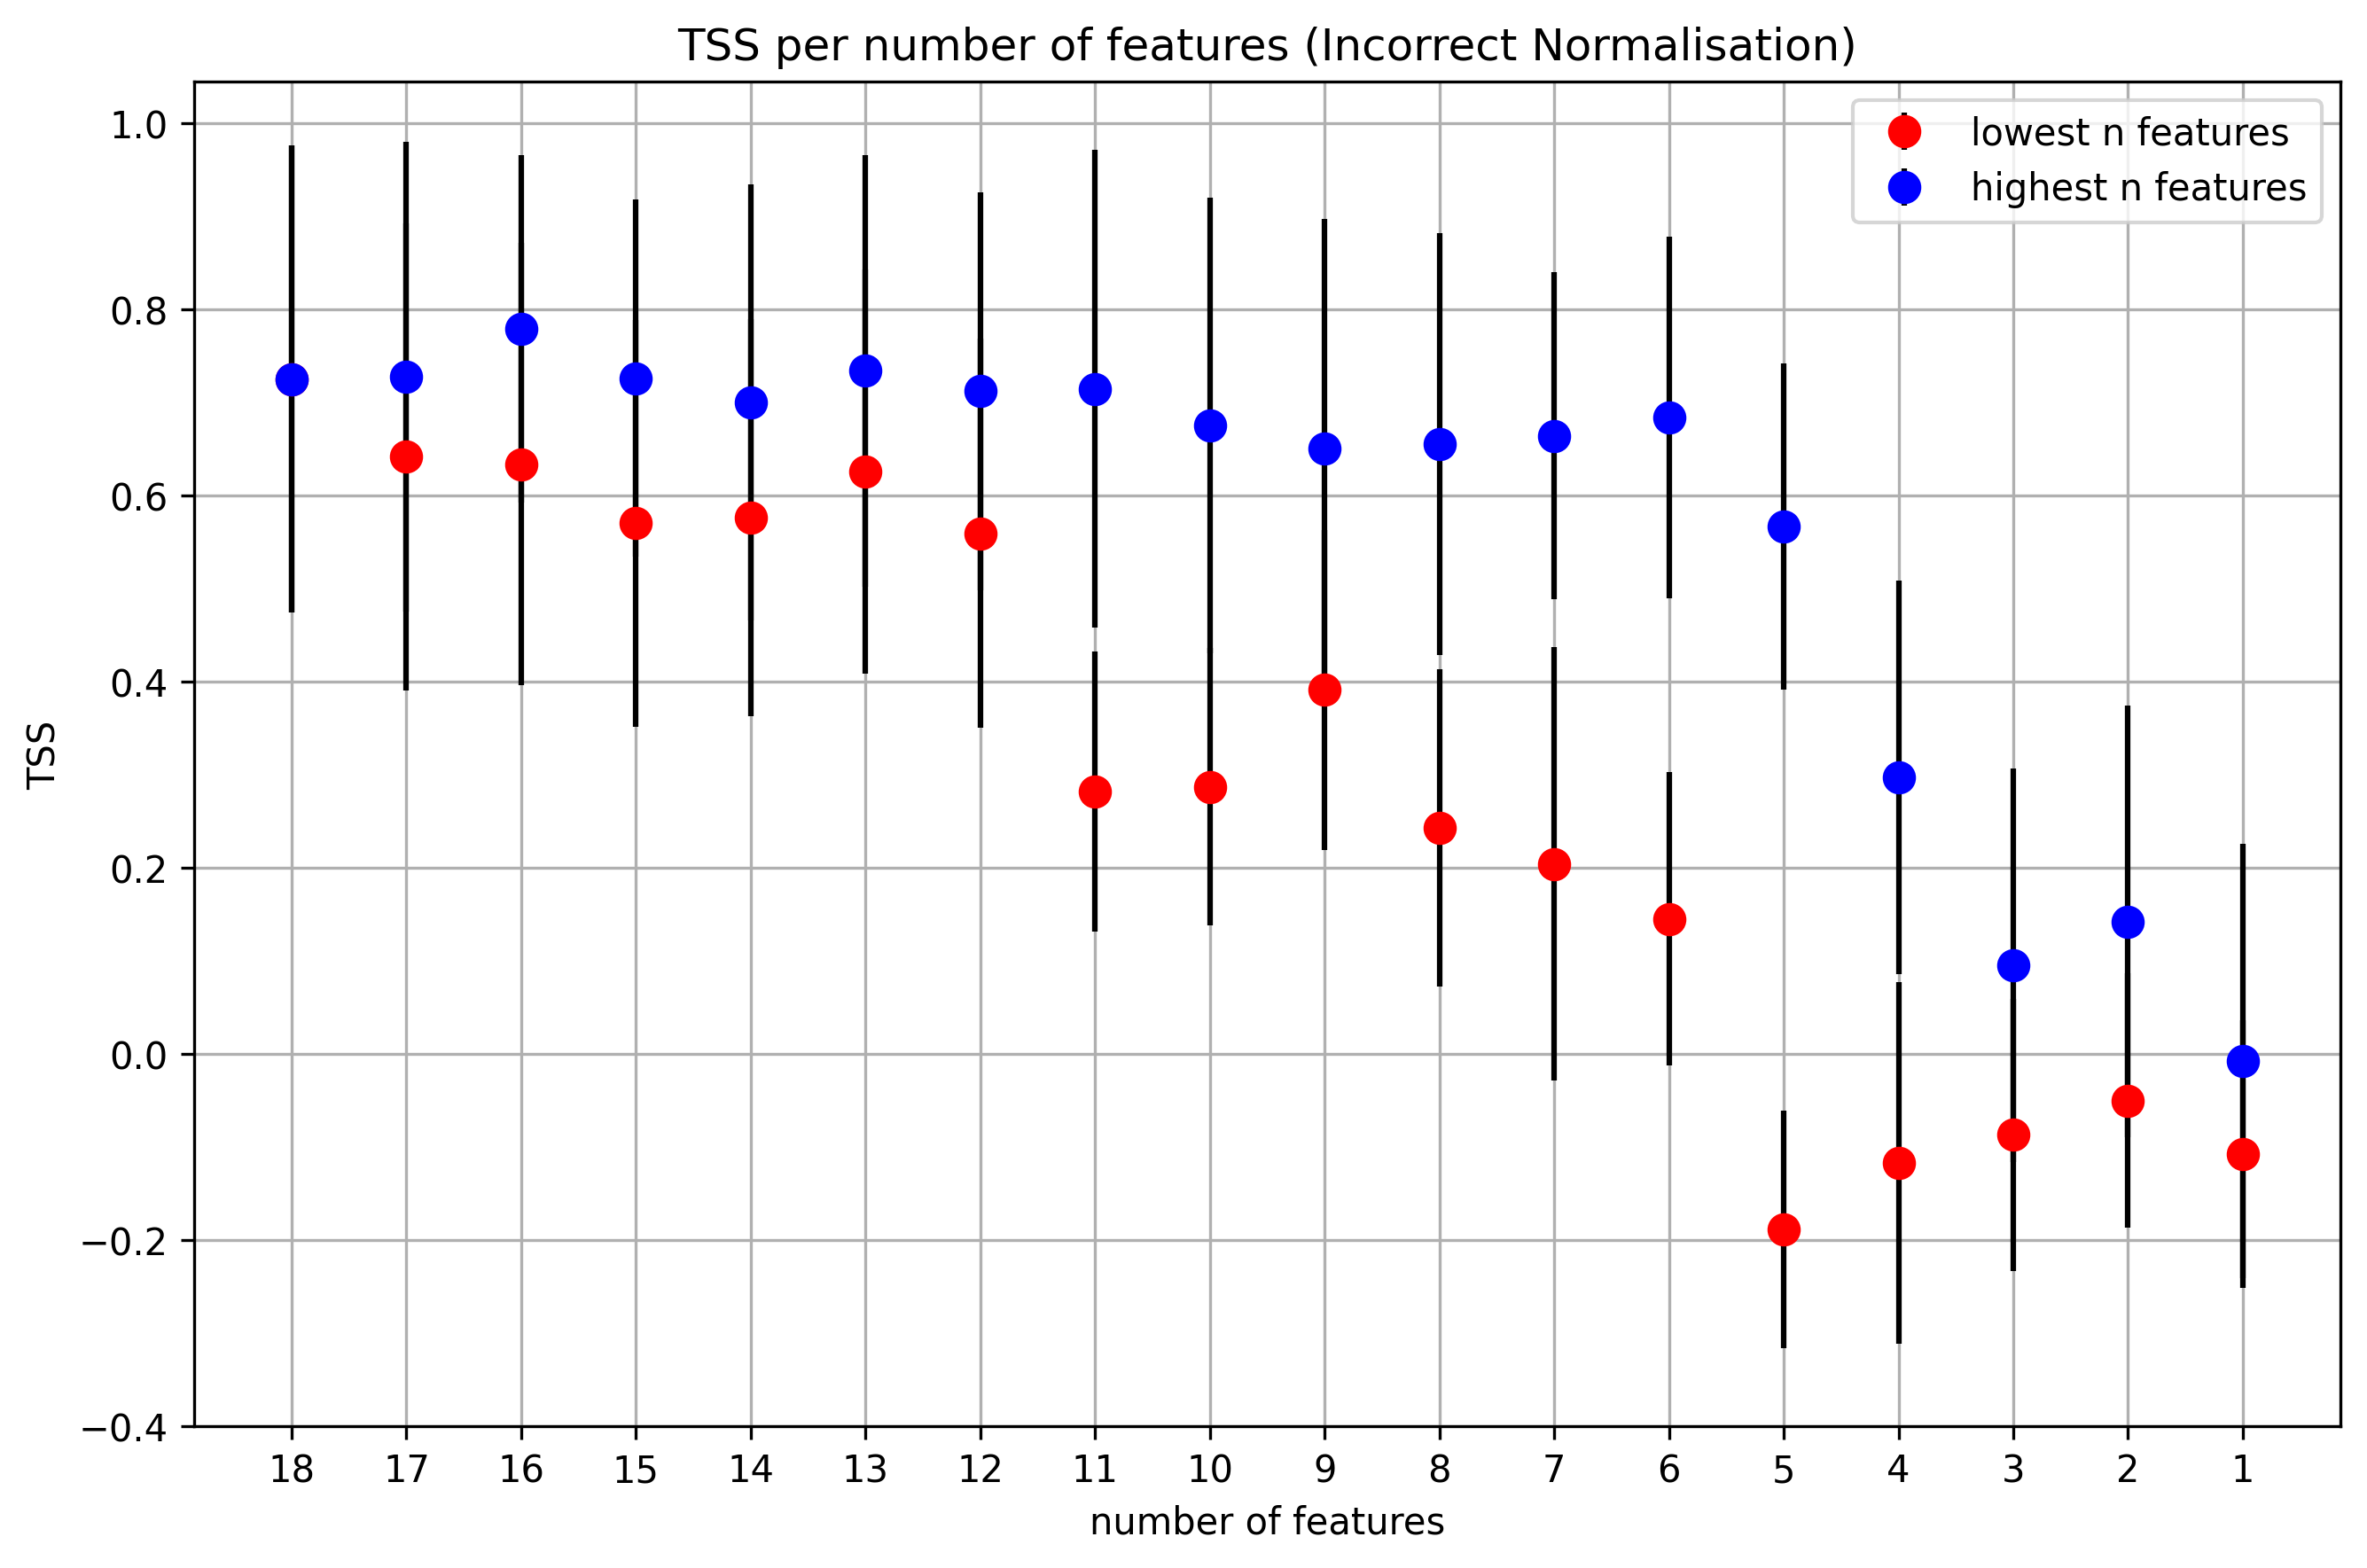

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('number of features')
plt.ylabel('TSS')
plt.title('TSS per number of features (Incorrect Normalisation)')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [35]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,-0.007447,0.233512,-0.107673,0.143505
1,2,0.142312,0.231447,-0.050015,0.136228
2,3,0.095135,0.211188,-0.087057,0.145829
3,4,0.296862,0.211337,-0.117267,0.193963
4,5,0.566216,0.175296,-0.188243,0.127507
5,6,0.683529,0.193919,0.145165,0.157818
6,7,0.664009,0.176019,0.204009,0.232690
7,8,0.655045,0.226945,0.243078,0.170326
8,9,0.650120,0.246680,0.390946,0.171811
9,10,0.674970,0.244285,0.286832,0.148916


# Correct Normalisation

  Here I am first combining the positive and the negative data and then normalizing it.

In [36]:
positive = pd.read_csv("positive_class_events.txt", delimiter=" ")
negative = pd.read_csv("negative_class_events.txt", delimiter=" ")

In [37]:
data = pd.concat([positive,negative],axis =0,ignore_index=True)
data

,HARPNUM,NOAA_Number,Class,Peak_Time,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,...,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,377,11158,X2.2,2011.02.14_01:56_TAI,2.292718e+22,103.723,0.019589,14129.660,56.345,3015.888,...,60.431,111.241,0.106767,5.414409e+13,1.196893e+13,7.140573e+23,51.393,945.314636,4.805,745.381
1,401,11166,M2.0,2011.03.06_14:30_TAI,2.352848e+22,90.899,-0.001738,9597.931,45.475,1744.633,...,51.832,95.061,0.132527,3.944855e+13,5.053109e+12,4.864565e+23,44.730,961.502686,4.303,66.343
2,393,11164,M3.7,2011.03.06_20:12_TAI,6.354885e+22,89.238,0.006680,8901.316,28.829,4435.788,...,41.470,97.150,-0.078173,8.578735e+13,3.416153e+13,1.096926e+24,36.080,1934.446167,4.842,619.857
3,637,11226,M2.5,2011.06.06_06:41_TAI,2.652940e+22,104.938,0.007635,3160.181,14.941,1671.507,...,35.535,105.271,0.019029,3.907187e+13,1.933770e+13,2.001693e+23,29.753,970.551636,3.967,364.119
4,750,11261,M6.0,2011.08.02_13:48_TAI,2.172087e+22,105.247,0.026394,9839.566,42.920,2712.405,...,53.330,108.889,0.296319,5.146747e+13,4.453954e+13,5.369127e+23,43.722,1259.099854,4.777,1084.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,5526,12335,M2.6,2015.05.04_17:24_TAI,2.524563e+22,105.354,0.005802,8447.712,40.166,2233.840,...,49.804,109.442,0.124192,4.678999e+13,9.587698e+12,4.509788e+23,42.409,1263.797485,4.498,233.215
416,5637,12360,M1.3,2015.06.12_07:29_TAI,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,...,31.916,87.984,-0.031624,5.653856e+13,1.703524e+12,4.489937e+23,26.183,1631.551880,4.462,111.481
417,5692,12371,M1.0,2015.06.19_06:48_TAI,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,...,53.730,95.842,-0.135981,6.695204e+13,2.357469e+13,1.586148e+24,47.933,1852.075806,4.995,644.160
418,5673,12367,M3.8,2015.06.20_09:44_TAI,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,...,36.470,114.836,-0.025103,5.857439e+13,2.133461e+13,4.428561e+23,31.039,1728.649536,4.532,358.677


In [38]:
data = data.drop(["HARPNUM","NOAA_Number","Class","Peak_Time"],axis =1)
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,2.292718e+22,103.723,0.019589,14129.660,56.345,3015.888,74.860,0.041215,60.431,111.241,0.106767,5.414409e+13,1.196893e+13,7.140573e+23,51.393,945.314636,4.805,745.381
1,2.352848e+22,90.899,-0.001738,9597.931,45.475,1744.633,54.893,-0.004057,51.832,95.061,0.132527,3.944855e+13,5.053109e+12,4.864565e+23,44.730,961.502686,4.303,66.343
2,6.354885e+22,89.238,0.006680,8901.316,28.829,4435.788,47.789,0.014906,41.470,97.150,-0.078173,8.578735e+13,3.416153e+13,1.096926e+24,36.080,1934.446167,4.842,619.857
3,2.652940e+22,104.938,0.007635,3160.181,14.941,1671.507,45.459,0.029249,35.535,105.271,0.019029,3.907187e+13,1.933770e+13,2.001693e+23,29.753,970.551636,3.967,364.119
4,2.172087e+22,105.247,0.026394,9839.566,42.920,2712.405,68.542,0.077827,53.330,108.889,0.296319,5.146747e+13,4.453954e+13,5.369127e+23,43.722,1259.099854,4.777,1084.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2.524563e+22,105.354,0.005802,8447.712,40.166,2233.840,65.211,0.014116,49.804,109.442,0.124192,4.678999e+13,9.587698e+12,4.509788e+23,42.409,1263.797485,4.498,233.215
416,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,37.319,0.003836,31.916,87.984,-0.031624,5.653856e+13,1.703524e+12,4.489937e+23,26.183,1631.551880,4.462,111.481
417,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,56.851,-0.014943,53.730,95.842,-0.135981,6.695204e+13,2.357469e+13,1.586148e+24,47.933,1852.075806,4.995,644.160
418,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,52.363,0.014466,36.470,114.836,-0.025103,5.857439e+13,2.133461e+13,4.428561e+23,31.039,1728.649536,4.532,358.677


In [39]:
data.shape

(420, 18)

In [40]:
data_n1 = normalize_the_data(data)
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [41]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[1.24850660e-01 3.72058636e+00 6.30274599e-01 2.15730841e-01
 7.64087674e-02 8.59476439e-01 3.17468060e+00 1.47472341e+00
 3.22112918e-02 6.51767138e+00 1.02433402e-01 2.87760092e-01
 8.72523762e+00 6.60754363e-01 2.96757005e-03 1.01466922e-01
 4.29462267e-05 8.53405236e+00]


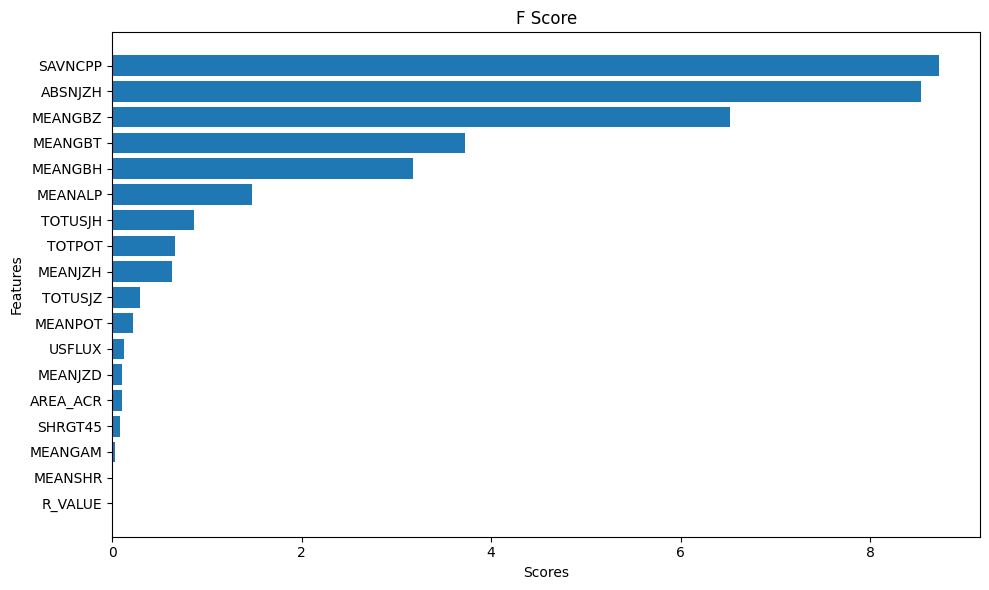

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [43]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [44]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [45]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# xdata are the examples
# ydata are the labels
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

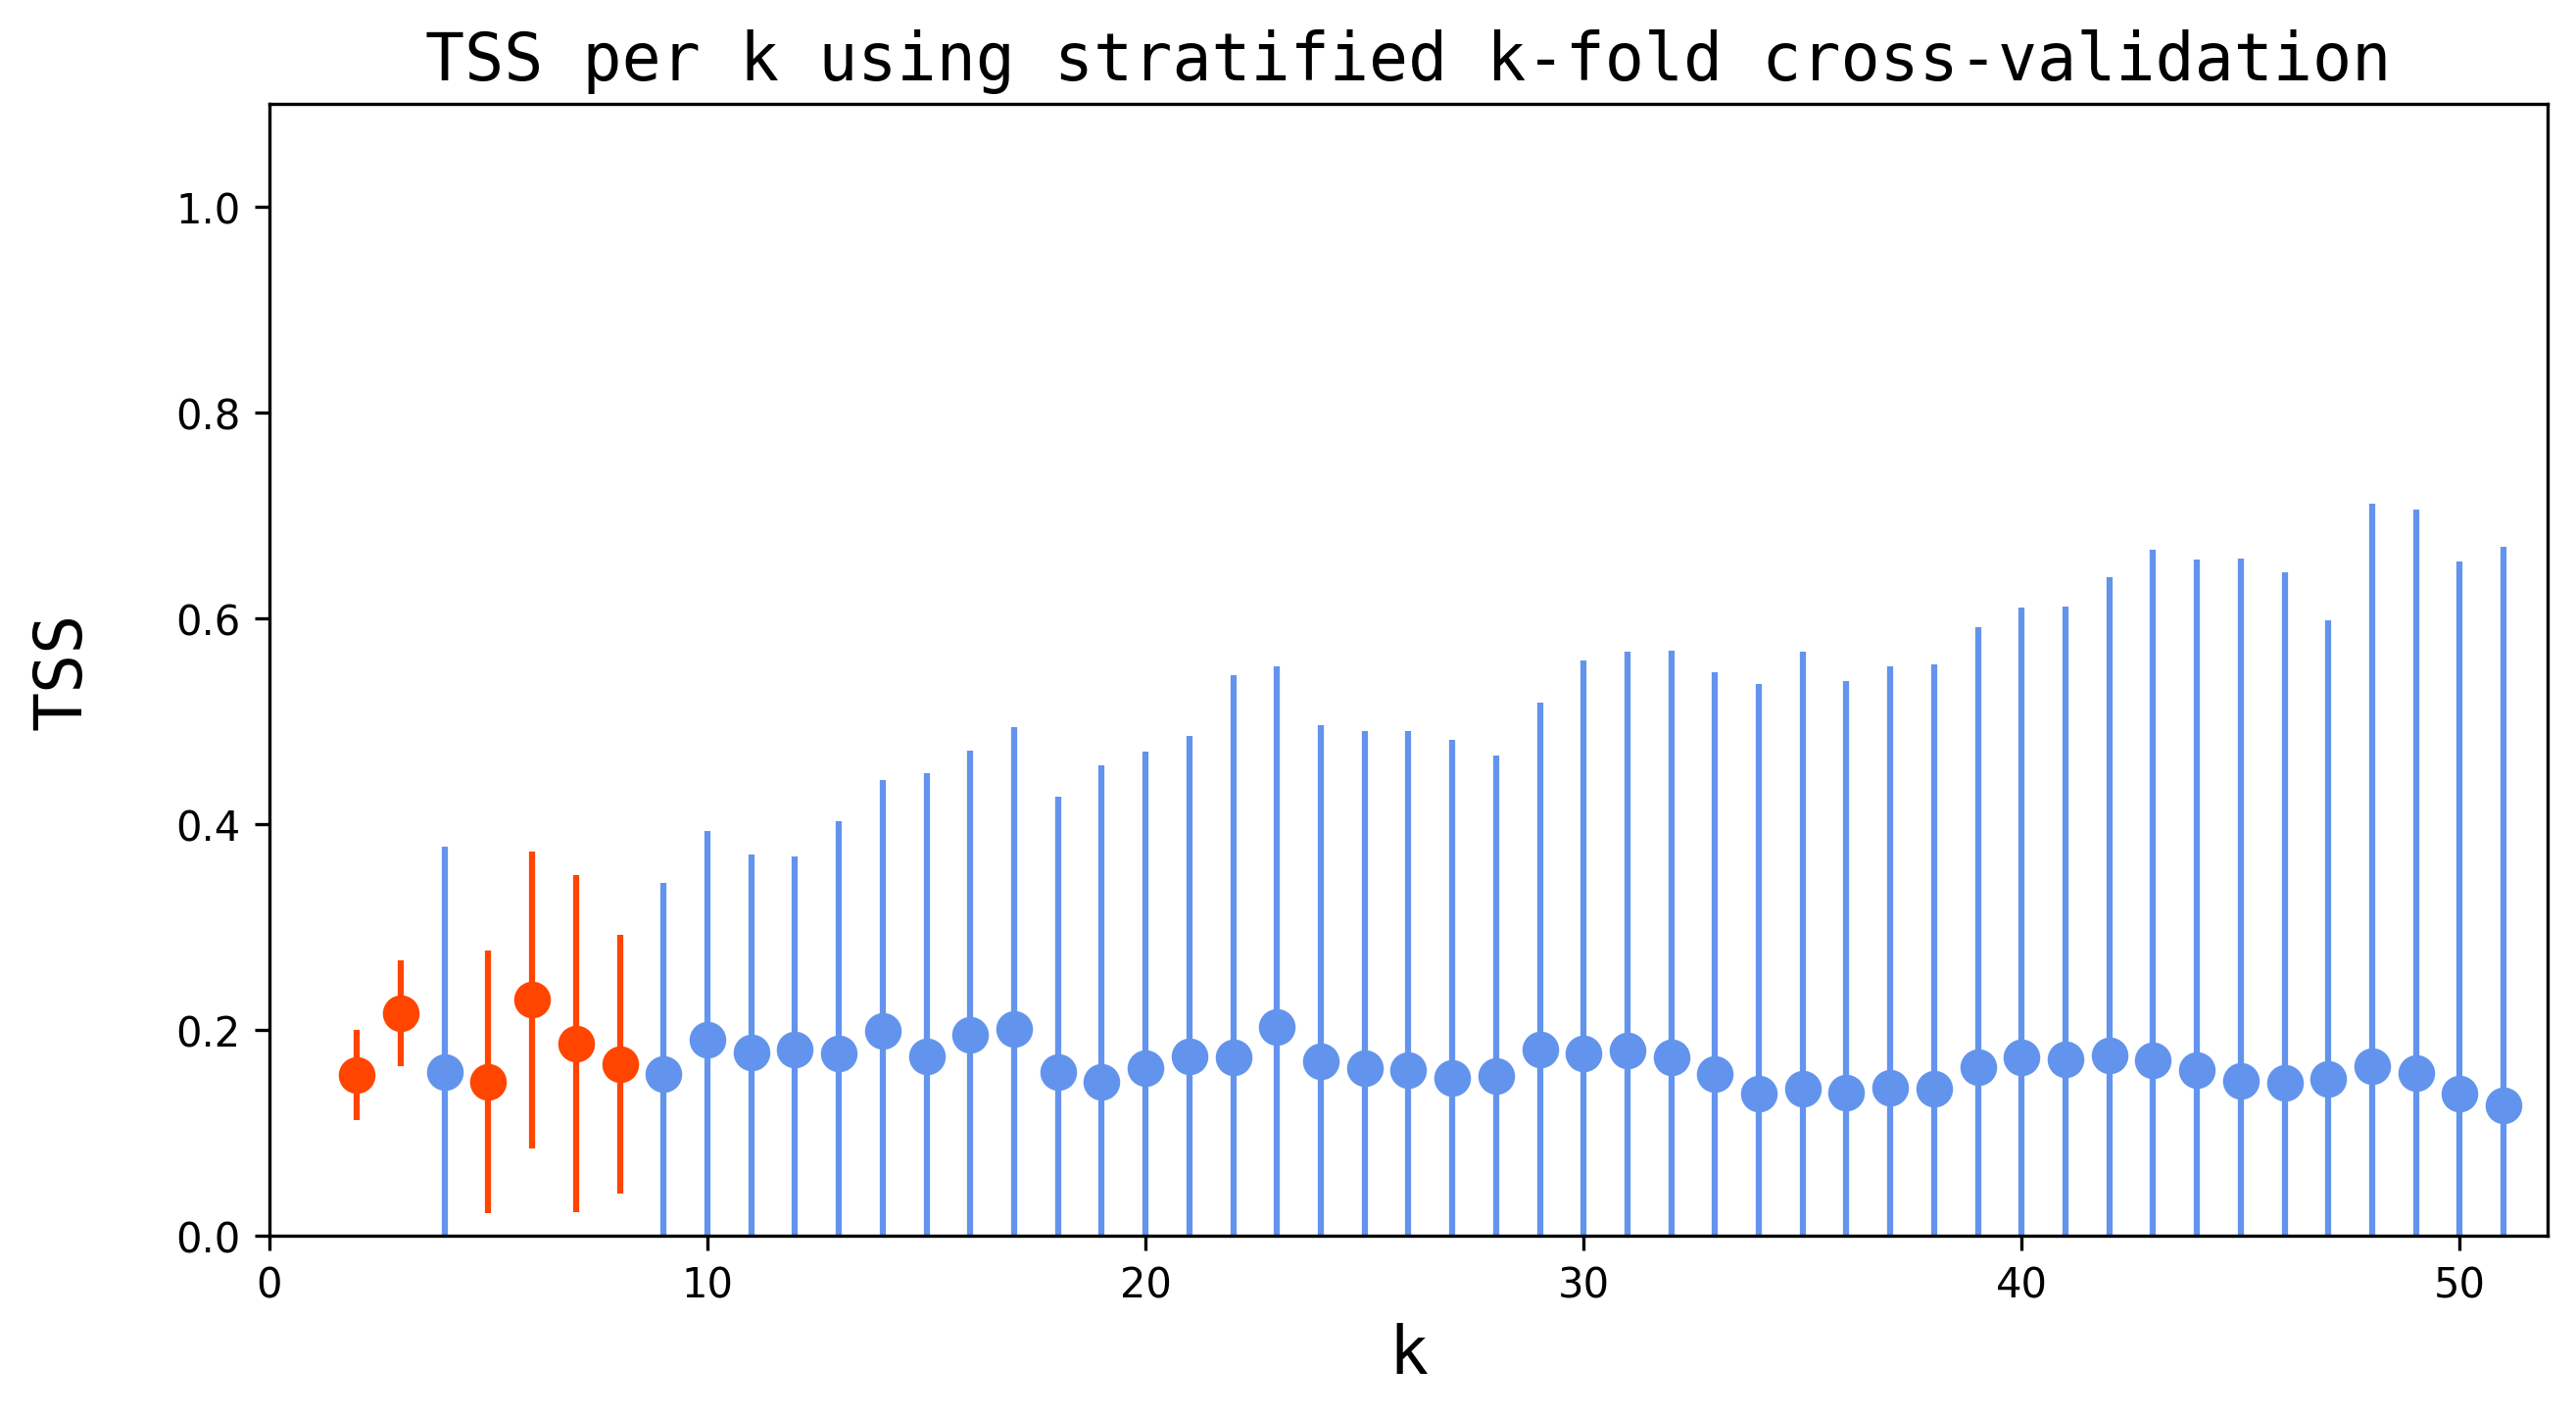

In [46]:
fig, ax = plt.subplots(figsize=(10, 8),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('k', **text_style)
ax.set_ylabel('TSS', labelpad=20, **text_style)
plt.title(r'TSS per k using stratified k-fold cross-validation', **text_style)
fig = plt.gcf()
fig.set_size_inches(10, 5)

In [47]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.17810727596823853 plus or minus 0.19295146348087114 .


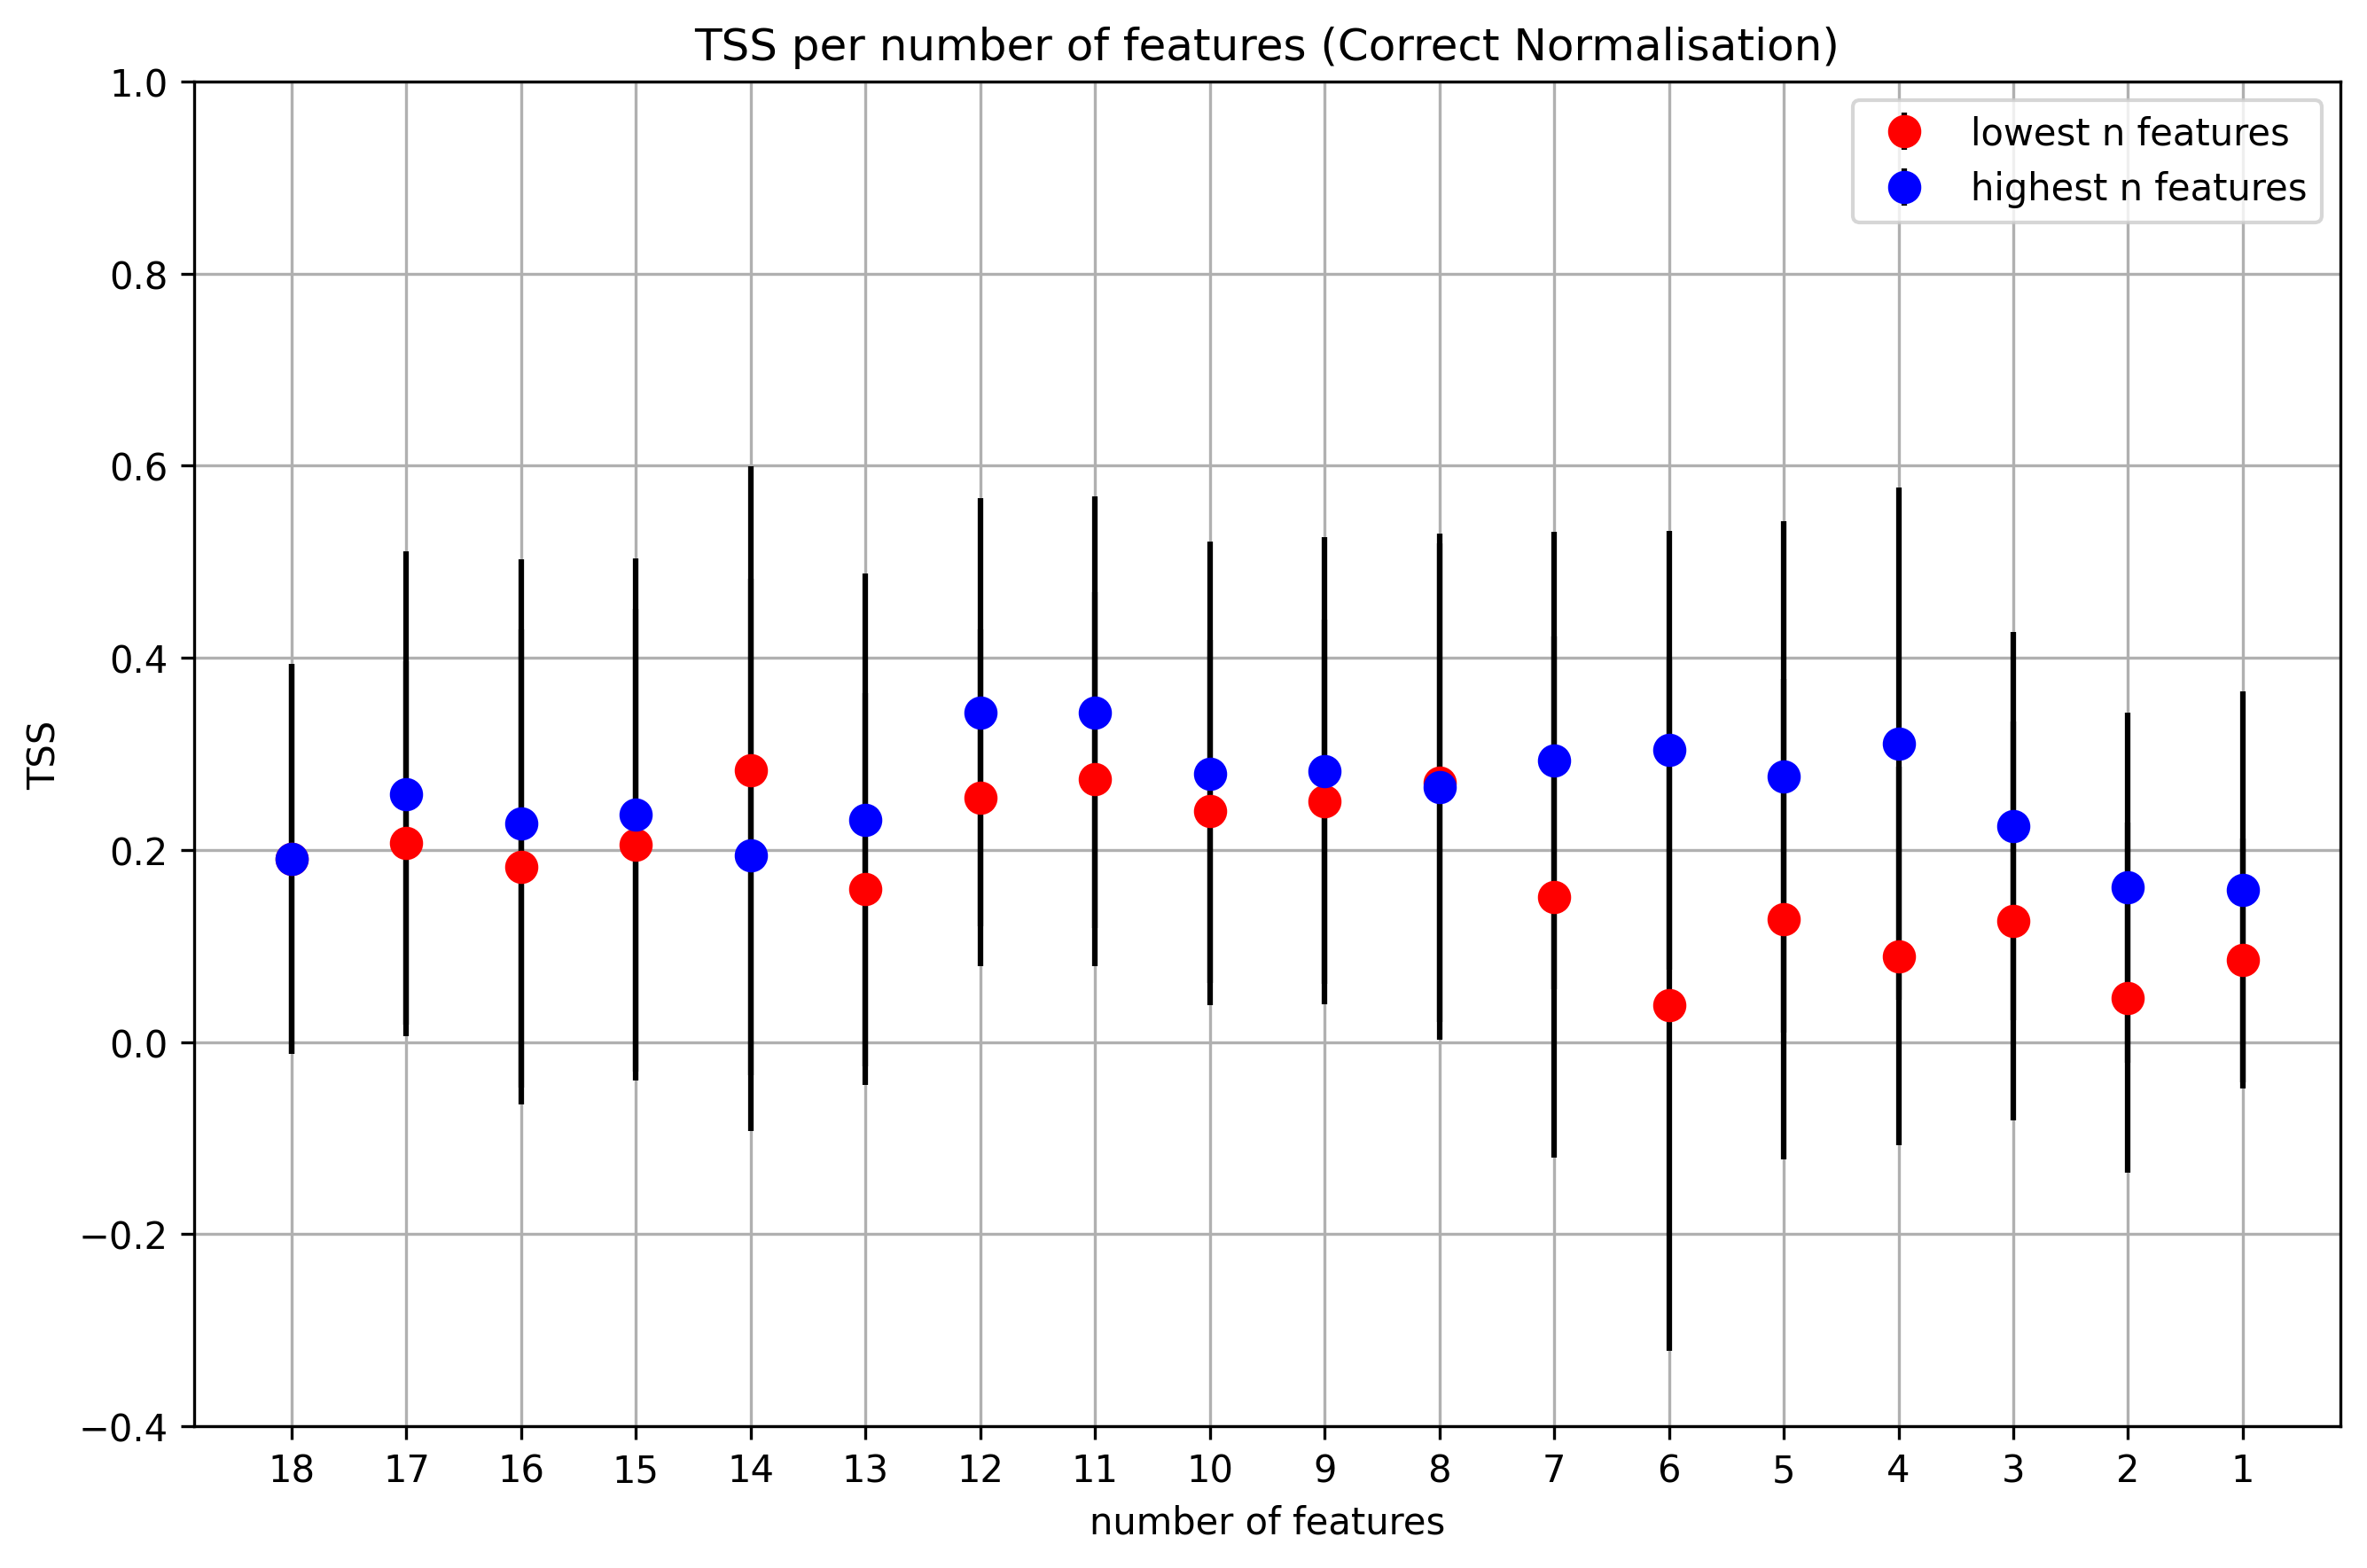

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('number of features')
plt.ylabel('TSS')
plt.title('TSS per number of features (Correct Normalisation)')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [49]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,0.158228,0.206591,0.085075,0.126521
1,2,0.160871,0.182075,0.046246,0.182212
2,3,0.224760,0.202082,0.126201,0.207727
3,4,0.310706,0.266969,0.089414,0.197113
4,5,0.276411,0.266353,0.127928,0.249696
5,6,0.303994,0.228390,0.038408,0.359911
6,7,0.293033,0.238071,0.150991,0.271591
7,8,0.265661,0.263444,0.269895,0.248963
8,9,0.282402,0.243318,0.250270,0.189624
9,10,0.279700,0.240980,0.240225,0.178415
